<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Nao-Prob/blob/main/Trabalho_Ex_1_Regress%C3%A3o_Linear_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 1 - Regressão Linear Múltipla

Variáveis: 
* mpg (contínua): consumo (em milhas por galão) em ciclo urbano.
* cylinders (discreta): número de cilindros do motor (de 4 a 8).
* displacement (contínua): capacidade volumétrica do motor, em polegadas³.
* horsepower (contínua): potência do motor, em HP.
* weight (contínua): peso do veículo, em libras.
* acceleration (contínua): tempo (em s) gasto na aceleração de 0 a 60 mph.
* model year (discreta): ano inicial de fabricação (módulo 100).
* origin (discreta): origem do veículo.
* car name (discreta): identificação (única) do automóvel.

Faça todo pré-processamento que julgar necessário e crie um modelo de regressão linear múltipla que relacione o consumo dos veículos com as demais informações. Parte das variáveis independentes pode ser descartada, exceto a região de fabricação, que precisa fazer parte da análise. Avalie a qualidade de ajuste do modelo e sua capacidade de generalização. Documente o seu fluxo de trabalho, decisões e conclusões.

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Leitura dos dados externos
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pós/ML MNP/Datasets/auto-mpg.csv")
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
# Verificação do DataFrame
dados_faltantes = df.isnull().sum()
dados_faltantes

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

A coluna da Potência dos veículos possui 6 dados faltantes e é a única com esse problema. 
A decisão será de excluir os dados dessas 6 linhas e realizar o estudo, tendo em vista que temos 398 linhas, pois as 6 eliminadas não serão um número muito significativo comparado ao total.

In [4]:
# Eliminação das linhas sem dados
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
# Variável dependente
y = df.mpg

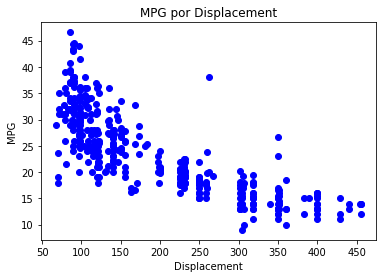

Matriz de correlações entre MPG (y) e Displacement:
[[ 1.         -0.80512695]
 [-0.80512695  1.        ]]


In [6]:
# Diagrama de dispersão entre MPG (y) e Displacement 
plt.scatter(df.displacement,y,color = 'blue')
plt.title("MPG por Displacement")
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

# Correlação entre MPG (y) e Displacement
coef_corr = np.corrcoef(df.displacement,y)
print("Matriz de correlações entre MPG (y) e Displacement:")
print(coef_corr)

Pelo gráfico e pela matriz de correlações percebe-se que o volume do motor apresenta correlação com o consumo em MPG, sendo assim, considerado nos dois modelos que serão estudados de Regressão Linear Múltipla.

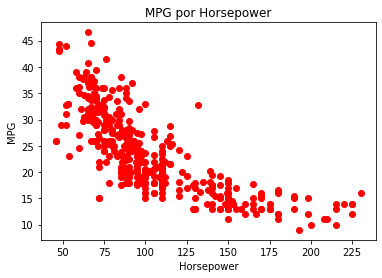

Matriz de correlações entre MPG (y) e Horsepower:
[[ 1.         -0.77842678]
 [-0.77842678  1.        ]]


In [7]:
# Diagrama de dispersão entre MPG (y) e Horsepower 
plt.scatter(df.horsepower,y,color = 'red')
plt.title("MPG por Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

# Correlação entre MPG (y) e Horsepower 
coef_corr = np.corrcoef(df.horsepower,y)
print("Matriz de correlações entre MPG (y) e Horsepower:")
print(coef_corr)

Pelo gráfico e pela matriz de correlações percebe-se que a potência do motor apresenta correlação com o consumo em MPG, assim será considerada nos dois modelos estudados de Regressão Linear Múltipla.

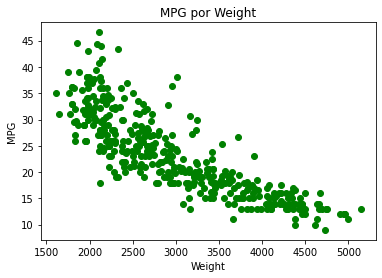

Matriz de correlações entre MPG (y) e Weight:
[[ 1.         -0.83224421]
 [-0.83224421  1.        ]]


In [8]:
# Diagrama de dispersão entre MPG (y) e Weight	 
plt.scatter(df.weight,y,color = 'green')
plt.title("MPG por Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

# Correlação entre MPG (y) e Weight 
coef_corr = np.corrcoef(df.weight,y)
print("Matriz de correlações entre MPG (y) e Weight:")
print(coef_corr)

Pelo gráfico e pela matriz de correlações percebe-se que o peso também apresenta correlação com o consumo em MPG. Será considerado em ambos os modelos de Regressão Linear Múltipla.

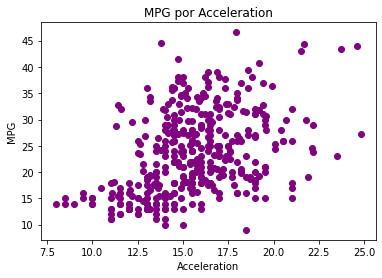

Matriz de correlações entre MPG (y) e Acceleration:
[[1.         0.42332854]
 [0.42332854 1.        ]]


In [9]:
# Diagrama de dispersão entre MPG (y) e Acceleration 
plt.scatter(df.acceleration,y,color = 'purple')
plt.title("MPG por Acceleration")
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.show()

# Correlação entre MPG (y) e Acceleration 
coef_corr = np.corrcoef(df.acceleration,y)
print("Matriz de correlações entre MPG (y) e Acceleration:")
print(coef_corr)

Pelo gráfico e pela matriz de correlações percebe-se que a aceleração apresenta correlação moderada com o consumo em MPG, por isso será considerada somente em um dos modelos de Regressão Linear Múltipla.

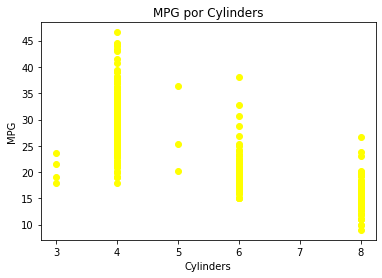

In [10]:
# Diagrama de dispersão entre MPG (y) e Cylinders
plt.scatter(df.cylinders,y,color = 'yellow')
plt.title("MPG por Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.show()

Pelo gráfico não percebe-se correlação entre o número de cilindros com o consumo em MPG, ambos os modelo terão esta variável.

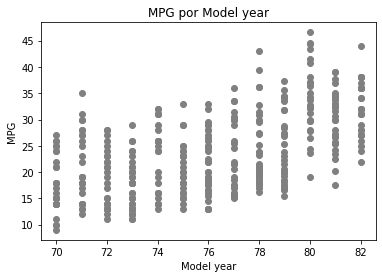

In [11]:
# Diagrama de dispersão entre MPG (y) e Model year
plt.scatter(df['model year'],y,color = 'gray')
plt.title("MPG por Model year")
plt.xlabel("Model year")
plt.ylabel("MPG")
plt.show()

Pelo gráfico percebe-se que o ano do modelo do carro apresenta correlação com o consumo em MPG, por isso esta variável será considerada em ambos os modelos de Regressão Linear Múltipla.

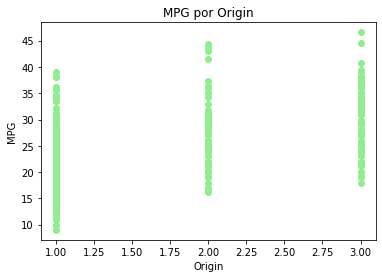

In [12]:
# Diagrama de dispersão entre MPG (y) e Origin
plt.scatter(df.origin,y,color = 'lightgreen')
plt.title("MPG por Origin")
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

A variável origem foi pedida para entrar no modelo de Regressão Linear Múltipla, mesmo assim é possível perceber alguma relação entre a origem e o consumo do carro.

In [13]:
# Codificação one-hot na variável ORIGIN, criando três novas colunas no df
df = pd.concat([df,pd.get_dummies(df.origin)],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,1,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0,0


In [14]:
df = df.rename(columns={1: "origin_1",2: "origin_2",3: "origin_3"})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0,0


In [15]:
# Não será considerada a variável nome dos modelos dos carros
# Modelo 1 (Volume, Potência, Peso, Aceleração, Cilindros, Ano do modelo, Origem)
X1 = df[['displacement','horsepower','weight','acceleration','cylinders','model year','origin_2','origin_3']]
print(f'Dimensões de X1: {X1.shape}')

# Modelo 2 (Volume, Potência, Peso, Ano do modelo, Origem)
X2 = df[['displacement','horsepower','weight','model year','origin_2','origin_3']]
print(f'Dimensões de X2: {X2.shape}')

print(f'Dimensões de y: {y.shape}')

Dimensões de X1: (392, 8)
Dimensões de X2: (392, 6)
Dimensões de y: (392,)


In [16]:
# Treinamento do Modelo 1 e Coeficiente de determinação do modelo 1
modelo1 = LinearRegression()
modelo1.fit(X1,y)
R21 = modelo1.score(X1,y)

# Exibição dos parâmetros do modelo 1
print(f'Coeficiente linear do modelo 1 = {modelo1.intercept_}')
print(f'Coeficientes angulares do modelo 1 = {modelo1.coef_}')
print(f'R1² = {R21}')

# Treinamento do Modelo 2 e Coeficiente de determinação do modelo 2
modelo2 = LinearRegression()
modelo2.fit(X2,y)
R22 = modelo2.score(X2,y)

# Exibição dos parâmetros do modelo 2
print(f'\nCoeficiente linear do modelo 2 = {modelo2.intercept_}')
print(f'Coeficientes angulares do modelo 2 = {modelo2.coef_}')
print(f'R2² = {R22}')

Coeficiente linear do modelo 1 = -17.95460206729025
Coeficientes angulares do modelo 1 = [ 0.02397864 -0.01818346 -0.00671038  0.07910304 -0.48970942  0.77702694
  2.63000236  2.85322823]
R1² = 0.8241994699119173

Coeficiente linear do modelo 2 = -17.503569715388263
Coeficientes angulares do modelo 2 = [ 0.01554866 -0.02304441 -0.00656529  0.77486346  2.59582082  2.77220941]
R2² = 0.8227744703573572


In [17]:
# Coeficiente de determinação ajustado
n = len(y)      # Quantidade de dados de treino
k1 = X1.shape[1]  # Quantidade de variáveis independentes do modelo 1 (=8)
k2 = X2.shape[1]  # Quantidade de variáveis independentes do modelo 2 (=6)

R21ajust = 1-((n-1)/(n-k1-1))*(1-R21)  # R1^2 ajustado
print(f'Coeficiente de determinação ajustado do modelo 1: {R21ajust:.4f}')

R22ajust = 1-((n-1)/(n-k2-1))*(1-R22)  # R2^2 ajustado
print(f'Coeficiente de determinação ajustado do modelo 2: {R22ajust:.4f}')

Coeficiente de determinação ajustado do modelo 1: 0.8205
Coeficiente de determinação ajustado do modelo 2: 0.8200


Percebe-se um desempenho bem similar dos dois modelos, com o modelo 1 (aquele que considera o número de cilindros e aceleração) sendo ligeiramente superior apresentando R² = 0.8205, assim é o modelo mais bem ajustado aos dados.

In [18]:
# Avaliação do RMSE
y1_prev = modelo1.predict(X1)
print(f'RMSE modelo 1: {mean_squared_error(y,y1_prev, squared = False)}')

y2_prev = modelo2.predict(X2)
print(f'RMSE modelo 2: {mean_squared_error(y,y2_prev, squared = False)}')

RMSE modelo 1: 3.268351515330416
RMSE modelo 2: 3.281571041890876


Como esperado o RMSE do modelo 1 é ligeiramente menor em relação ao do modelo 2.

In [19]:
# Capacidade de generalização do modelo 1, modelo com melhor desempenho entre os dois estudados 
# Validação cruzada hold-out 
X1_treino, X1_teste, y_treino, y_teste = train_test_split(X1,y,train_size = 0.8)

print(f'Dimensões dos dados de treino: {X1_treino.shape}')
print(f'Dimensões dos dados de teste: {X1_teste.shape}')

Dimensões dos dados de treino: (313, 8)
Dimensões dos dados de teste: (79, 8)


In [20]:
# Treina o modelo 1, apenas com os dados de treino
modelo1_ho = LinearRegression()
modelo1_ho.fit(X1_treino,y_treino)

# Calcula o RMSE do modelo 1 para os dados de teste
y_prev_ho = modelo1_ho.predict(X1_teste)
RMSE_ho = mean_squared_error(y_teste,y_prev_ho,squared = False)
print(f'RMSE do modelo 1 com validação cruzada hold-out: {RMSE_ho}')
print(f'Média do consumo em milhas por galão: {df.mpg.mean()}')
print(f'RMSE em comparação com a média dos dados: {RMSE_ho/df.mpg.mean()*100:.4f}%')

RMSE do modelo 1 com validação cruzada hold-out: 3.0904716436600386
Média do consumo em milhas por galão: 23.44591836734694
RMSE em comparação com a média dos dados: 13.1813%


Utilizando a validação cruzada hold-out o RMSE deu um valor entre 3 e 4, analisando juntamente com a média de consumo dos dados, pode-se dizer que o modelo tem uma boa generalização para os dados de teste deste modelo.

In [21]:
# Validação cruzada k-folds no modelo 1
aval = cross_val_score(modelo1,X1,y,cv = 10,scoring = 'neg_root_mean_squared_error')
M = np.mean(-aval)            # Média das avaliações
DP = np.std(-aval,ddof = 1)   # Desvio padrão das avaliações
CV_aval = 100*DP/M            # Coeficiente de variação das avaliações

#print(f'Valores de RMSE obtidos: {-aval}')
print(f'RMSE médio = {M}')
print(f'Coeficiente de variação: {CV_aval:.4f}%')

RMSE médio = 3.4357561127739835
Coeficiente de variação: 26.8900%


Utilizando a validação cruzada k-folds no modelo 1 percebe-se um RMSE médio mais alto em relação a validação cruzada hold-out, podendo ser explicado pelo número baixo de dados de teste. Além disso, obteve-se uma variação moderada no valor do RMSE médio (>20%).